In [ ]:
import scipy.io

In [3]:
import scipy.io as sp

In [4]:
mat = sp.loadmat('test_data.mat')

In [23]:
test = mat
trainfile = sp.loadmat('train_data.mat')

In [13]:
train_data = train['train_data']
train_data.shape

(12000, 12000)

In [34]:
import numpy as np
train_labels = trainfile['train_info'][0][0][2]
train_labels.shape 

(12000, 1)

In [17]:
test_data = test['test_data']
test_data.shape

(8580, 12000)

In [62]:
li = sp.loadmat('lists/test_list.mat')
labels=[]
for i in li['labels']:
    labels.append(i)

In [65]:
labels[0]

array([1], dtype=uint8)

In [18]:
import tensorflow as tf
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

x = tf.placeholder(tf.float32,shape=[None,3888])
y_true = tf.placeholder(tf.float32,shape=[None,20])

x_image = tf.reshape(x,[-1,36,36,3])

convo_1 = convolutional_layer(x_image,shape=[6,6,3,32])
convo_1_pooling = max_pool_2by2(convo_1)

convo_2 = convolutional_layer(convo_1_pooling,shape=[6,6,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

convo_2_flat = tf.reshape(convo_2_pooling,[-1,9*9*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))

hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

y_pred = normal_full_layer(full_one_dropout,20)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)

init = tf.global_variables_initializer()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:
2+3

In [9]:
2+3

5

In [10]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Mar 28 12:07:09 2012',
 '__version__': '1.0',
 '__globals__': [],
 'test_info': array([[(array([[array(['n02085620-Chihuahua/n02085620_2650.jpg'], dtype='<U38')],
        [array(['n02085620-Chihuahua/n02085620_4919.jpg'], dtype='<U38')],
        [array(['n02085620-Chihuahua/n02085620_1765.jpg'], dtype='<U38')],
        ...,
        [array(['n02116738-African_hunting_dog/n02116738_3635.jpg'], dtype='<U48')],
        [array(['n02116738-African_hunting_dog/n02116738_2988.jpg'], dtype='<U48')],
        [array(['n02116738-African_hunting_dog/n02116738_6330.jpg'], dtype='<U48')]],
       dtype=object), array([[array(['n02085620-Chihuahua/n02085620_2650'], dtype='<U34')],
        [array(['n02085620-Chihuahua/n02085620_4919'], dtype='<U34')],
        [array(['n02085620-Chihuahua/n02085620_1765'], dtype='<U34')],
        ...,
        [array(['n02116738-African_hunting_dog/n02116738_3635'], dtype='<U44')],
        [array(['

In [11]:
mat[:5]

TypeError: unhashable type: 'slice'

In [ ]:
type(mat)

In [13]:
mat["test_data"]

array([[0.42297642, 0.44567102, 0.44322268, ..., 0.11023967, 0.28878223,
        0.16612349],
       [0.4346575 , 0.36657143, 0.37279967, ..., 0.22414799, 0.30590121,
        0.25217826],
       [0.41025734, 0.45473016, 0.42543391, ..., 0.15453042, 0.32431428,
        0.20263375],
       ...,
       [0.28498557, 0.20938963, 0.24384632, ..., 0.49464286, 0.32798978,
        0.47575572],
       [0.39380501, 0.33590476, 0.33118885, ..., 0.2584127 , 0.34057349,
        0.31977051],
       [0.33602892, 0.2005464 , 0.21812583, ..., 0.36979167, 0.25407723,
        0.35944589]])

In [14]:
mat["test_data"].length

AttributeError: 'numpy.ndarray' object has no attribute 'length'

In [15]:
mat["test_data"].size

102960000

In [16]:
mat["test_data"][:10]

array([[0.42297642, 0.44567102, 0.44322268, ..., 0.11023967, 0.28878223,
        0.16612349],
       [0.4346575 , 0.36657143, 0.37279967, ..., 0.22414799, 0.30590121,
        0.25217826],
       [0.41025734, 0.45473016, 0.42543391, ..., 0.15453042, 0.32431428,
        0.20263375],
       ...,
       [0.41796013, 0.3140458 , 0.35563622, ..., 0.25627413, 0.30447635,
        0.31081748],
       [0.36811272, 0.28262908, 0.2941138 , ..., 0.26035559, 0.2534678 ,
        0.23402772],
       [0.41037606, 0.41639704, 0.4065728 , ..., 0.15391007, 0.3243815 ,
        0.22571678]])

In [17]:
mat["test_data"][0]

array([0.42297642, 0.44567102, 0.44322268, ..., 0.11023967, 0.28878223,
       0.16612349])

In [18]:
mat["test_data"][0][0]

0.4229764159451651

In [19]:
mat["test_data"][0][3]

0.38519857176214123

In [20]:
X_train = sp.loadmat('train_data.mat')

In [21]:
X_train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Mar 28 12:03:37 2012',
 '__version__': '1.0',
 '__globals__': [],
 'train_info': array([[(array([[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')],
        [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')],
        [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')],
        ...,
        [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')],
        [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')],
        [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]],
       dtype=object), array([[array(['n02085620-Chihuahua/n02085620_5927'], dtype='<U34')],
        [array(['n02085620-Chihuahua/n02085620_4441'], dtype='<U34')],
        [array(['n02085620-Chihuahua/n02085620_1502'], dtype='<U34')],
        ...,
        [array(['n02116738-African_hunting_dog/n02116738_6754'], dtype='<U44')],
        [array([

In [1]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

In [2]:
def image_to_feature_vector(image, size=(32, 32)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

In [3]:
def extract_color_histogram(image, bins=(8, 8, 8)):
	# extract a 3D color histogram from the HSV color space using
	# the supplied number of `bins` per channel
	hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
	hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
		[0, 180, 0, 256, 0, 256])
 
	# handle normalizing the histogram if we are using OpenCV 2.4.X
	if imutils.is_cv2():
		hist = cv2.normalize(hist)
 
	# otherwise, perform "in place" normalization in OpenCV 3 (I
	# personally hate the way this is done
	else:
		cv2.normalize(hist, hist)
 
	# return the flattened histogram as the feature vector
	return hist.flatten()

In [4]:
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-d", "--dataset", required=True,
	help="path to input dataset")
ap.add_argument("-k", "--neighbors", type=int, default=1,
	help="# of nearest neighbors for classification")
ap.add_argument("-j", "--jobs", type=int, default=-1,
	help="# of jobs for k-NN distance (-1 uses all available cores)")
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -d DATASET [-k NEIGHBORS] [-j JOBS]
ipykernel_launcher.py: error: the following arguments are required: -d/--dataset


SystemExit: 2

c:\users\studa\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
ap = argparse.ArgumentParser()

In [6]:
ap.add_argument("-d", "--dataset", required=True,help="path to input dataset")

_StoreAction(option_strings=['-d', '--dataset'], dest='dataset', nargs=None, const=None, default=None, type=None, choices=None, help='path to input dataset', metavar=None)

In [7]:
ap.add_argument("-k", "--neighbors", type=int, default=1,help="# of nearest neighbors for classification")

_StoreAction(option_strings=['-k', '--neighbors'], dest='neighbors', nargs=None, const=None, default=1, type=<class 'int'>, choices=None, help='# of nearest neighbors for classification', metavar=None)

In [8]:
ap.add_argument("-j", "--jobs", type=int, default=-1,help="# of jobs for k-NN distance (-1 uses all available cores)")

_StoreAction(option_strings=['-j', '--jobs'], dest='jobs', nargs=None, const=None, default=-1, type=<class 'int'>, choices=None, help='# of jobs for k-NN distance (-1 uses all available cores)', metavar=None)

In [11]:
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -d DATASET [-k NEIGHBORS] [-j JOBS]
ipykernel_launcher.py: error: the following arguments are required: -d/--dataset


SystemExit: 2

In [12]:
app = QApplication(sys.argv)
app.aboutToQuit.connect(app.deleteLater)

NameError: name 'QApplication' is not defined

In [13]:
# grab the list of images that we'll be describing
print("[INFO] describing images...")
imagePaths = list(paths.list_images(args["dataset"]))
 
# initialize the raw pixel intensities matrix, the features matrix,
# and labels list
rawImages = []
features = []
labels = []

[INFO] describing images...


NameError: name 'args' is not defined

In [14]:
import cv2

In [15]:
img=cv2.imread('images/n02085620-Chihuahua/n02085620_1816.jpg',cv2.IMREAD_GRAYSCALE)

In [16]:
cv2.imshow('image',img)

In [1]:
2+3

5

In [2]:
image = cv2.imread('images/n02085620-Chihuahua/n02085620_1816.jpg',color)

NameError: name 'cv2' is not defined

In [3]:
import cv2

In [4]:
image = cv2.imread('images/n02085620-Chihuahua/n02085620_1816.jpg',color)

NameError: name 'color' is not defined

In [5]:
image = cv2.imread('images/n02085620-Chihuahua/n02085620_1816.jpg',cv2.IMREAD_color)

AttributeError: module 'cv2.cv2' has no attribute 'IMREAD_color'

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('images/n02085620-Chihuahua/n02085620_1816.jpg')

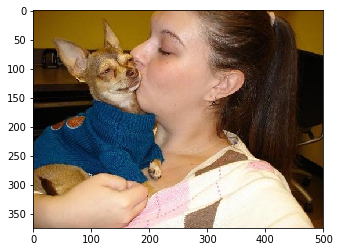

In [7]:
imgplot = plt.imshow(img)

In [9]:
img = img.convert('L')

AttributeError: 'numpy.ndarray' object has no attribute 'convert'

In [11]:
from PIL import Image

%matplotlib inline  

#Import an image
image = Image.open('images/n02085620-Chihuahua/n02085620_1816.jpg')

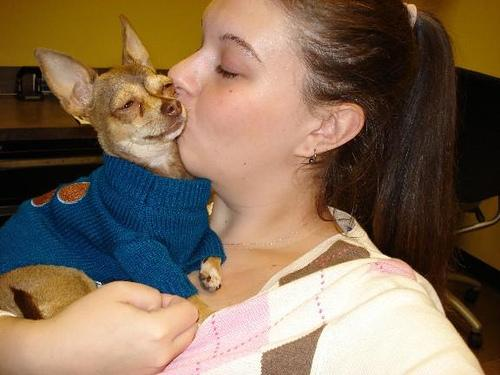

In [12]:
image

In [13]:
im = image.convert('L')

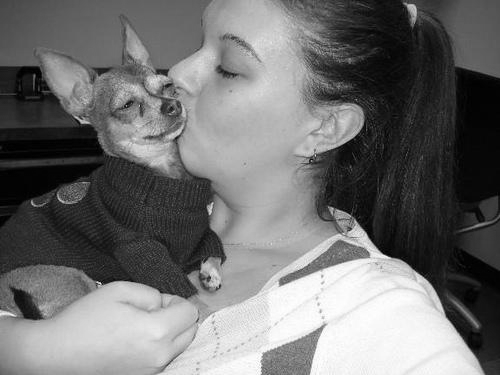

In [14]:
im

In [15]:
array(im)

NameError: name 'array' is not defined

In [16]:
im.array()

AttributeError: 'Image' object has no attribute 'array'

In [17]:
from PIL import Image
import glob
image_list = []
for filename in glob.glob('images/n02085620-Chihuahua/*.jpg'): #assuming gif
    im=Image.open(filename)
    image_list.append(im)

In [18]:
image_list

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x500 at 0x26EBA0F10B8>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=395x495 at 0x26EBA0F1048>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x298 at 0x26EBA0F1278>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=345x500 at 0x26EBA0F1198>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=322x484 at 0x26EBA080A90>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x26EBA0F12E8>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=382x384 at 0x26EBA0F1358>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500 at 0x26EBA0F13C8>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x225 at 0x26EBA0F1438>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=887x629 at 0x26EBA0F14A8>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x26EBA0F1518>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x26EBA0F1588>,
 <PI

In [19]:
import scipy.io as sp
mat = sp.loadmat('train_data.mat')

In [20]:
train =mat
train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'train_info', 'train_fg_data', 'train_data'])

In [21]:
train["train_info"]

array([[(array([[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]],
      dtype=object), array([[array(['n02085620-Chihuahua/n02085620_5927'], dtype='<U34')],
       [array(['n02085620-Chihuahua/n02085620_4441'], dtype='<U34')],
       [array(['n02085620-Chihuahua/n02085620_1502'], dtype='<U34')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_6754'], dtype='<U44')],
       [array(['n02116738-African_hunting_dog/n02116738_9333'], dtype='<U44')],
       [array(['n02116738-African_hunting_dog/n02116738_2503'], dtype='<U44')]],
      dtype=object),

In [22]:
train["train_data"]

array([[1.        , 0.37021212, 0.38627623, ..., 0.21216631, 0.33752761,
        0.26825407],
       [0.37021212, 1.        , 0.45434285, ..., 0.14359524, 0.3095    ,
        0.17709522],
       [0.38627623, 0.45434285, 1.        , ..., 0.16968838, 0.28702648,
        0.20437348],
       ...,
       [0.21216631, 0.14359524, 0.16968838, ..., 1.        , 0.22314713,
        0.41941136],
       [0.33752761, 0.3095    , 0.28702648, ..., 0.22314713, 1.        ,
        0.31585238],
       [0.26825407, 0.17709522, 0.20437348, ..., 0.41941136, 0.31585238,
        1.        ]])

In [23]:
train["train_data"].shape

(12000, 12000)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train["train_info"][0]

array([(array([[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]],
      dtype=object), array([[array(['n02085620-Chihuahua/n02085620_5927'], dtype='<U34')],
       [array(['n02085620-Chihuahua/n02085620_4441'], dtype='<U34')],
       [array(['n02085620-Chihuahua/n02085620_1502'], dtype='<U34')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_6754'], dtype='<U44')],
       [array(['n02116738-African_hunting_dog/n02116738_9333'], dtype='<U44')],
       [array(['n02116738-African_hunting_dog/n02116738_2503'], dtype='<U44')]],
      dtype=object), 

In [31]:
train["train_info"][0][0][2].shape

(12000, 1)

In [32]:
sa =[]
for i in range(0,12001):
    sa.append(train["train_info"][0][0][2].item(i))

IndexError: index 12000 is out of bounds for size 12000

In [33]:
import scipy.io as sp
mat1 = sp.loadmat('lists/train_list.mat')

In [34]:
labels = mat1
labels.keys()

dict_keys(['__header__', '__version__', '__globals__', 'file_list', 'annotation_list', 'labels'])

In [36]:
labels["labels"].shape

(12000, 1)

In [37]:
labels = labels["labels"]

In [38]:
labels

array([[  1],
       [  1],
       [  1],
       ...,
       [120],
       [120],
       [120]], dtype=uint8)

In [43]:
sa =[]
for i in range(0,12000):
    sa.append(labels.item(i))

In [45]:
import numpy as np

In [46]:
labels = np.array(sa)

In [47]:
labels.shape

(12000,)

In [55]:
labels

array([  1,   1,   1, ..., 120, 120, 120])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
train, labels, random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [6, 12000]

In [50]:
train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Mar 28 12:03:37 2012',
 '__version__': '1.0',
 '__globals__': [],
 'train_info': array([[(array([[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')],
        [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')],
        [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')],
        ...,
        [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')],
        [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')],
        [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]],
       dtype=object), array([[array(['n02085620-Chihuahua/n02085620_5927'], dtype='<U34')],
        [array(['n02085620-Chihuahua/n02085620_4441'], dtype='<U34')],
        [array(['n02085620-Chihuahua/n02085620_1502'], dtype='<U34')],
        ...,
        [array(['n02116738-African_hunting_dog/n02116738_6754'], dtype='<U44')],
        [array([

In [52]:
train = train["train_data"]

In [53]:
train.shape

(12000, 12000)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
train, labels, random_state=0)

In [57]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(3000,)

In [58]:
X_train.shape

(9000, 12000)

In [59]:
y_train.shape

(9000,)

In [60]:
X_test.shape

(3000, 12000)

In [61]:
y_test.shape

(3000,)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [63]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [64]:
knn.score(X_test,y_test)

0.049666666666666665

In [65]:
knn = KNeighborsClassifier(n_neighbors=3)

In [66]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [67]:
knn.score(X_test,y_test)*100

4.1000000000000005

In [68]:
knn = KNeighborsClassifier(n_neighbors=99)

In [69]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=99, p=2,
           weights='uniform')

In [70]:
knn.score(X_test,y_test)*100

3.833333333333333

In [71]:
knn = KNeighborsClassifier(n_neighbors=185)

In [72]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=185, p=2,
           weights='uniform')

In [73]:
knn.score(X_test,y_test)*100

4.3

In [74]:
knn = KNeighborsClassifier(n_neighbors=50)

In [75]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

In [76]:
knn.score(X_test,y_test)*100

4.433333333333334

In [77]:
from PIL import Image
image = Image.open('images/n02085620-Chihuahua/n02085620_1816.jpg')# Can be many different formats.

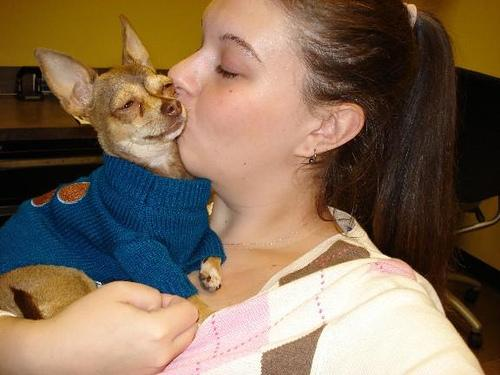

In [78]:
image

In [79]:
cv2.resize(image,(100,100))

TypeError: Expected cv::UMat for argument 'src'

In [80]:
size=(100,100)

In [81]:
cv2.resize(image, size)

TypeError: Expected cv::UMat for argument 'src'

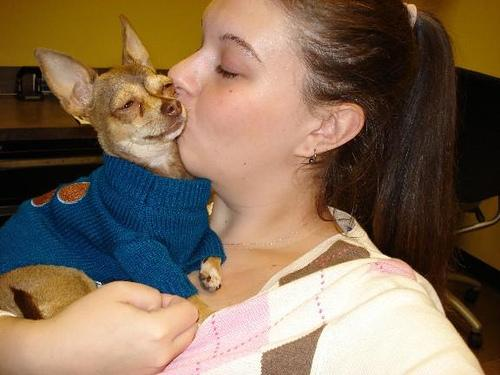

In [82]:
image

In [84]:
from resizeimage import resizeimage

ModuleNotFoundError: No module named 'resizeimage'

In [259]:
import numpy as np

In [86]:
import cv2

In [87]:
cv2.resize(image,(100,100))

TypeError: Expected cv::UMat for argument 'src'

In [88]:
small = scipy.misc.imresize(image, 0.5)

NameError: name 'scipy' is not defined

In [89]:
import scipy as sp

In [90]:
small = scipy.misc.imresize(image, 0.5)

NameError: name 'scipy' is not defined

In [91]:
import scipy 

In [92]:
small = scipy.misc.imresize(image, 0.5)

c:\users\studa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.


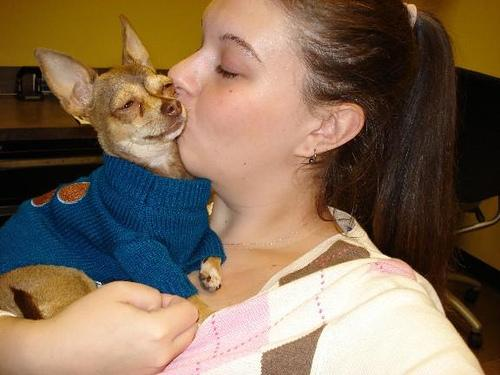

In [93]:
image

In [94]:
cv2.resize(cv2.UMat(imgUMat),image,(100,100))

NameError: name 'imgUMat' is not defined

In [95]:
img = cv2.UMat(cv2.imread('images/n02085620-Chihuahua/n02085620_1816.jpg', cv2.IMREAD_COLOR))

In [96]:
img

<UMat 0000026EAFDAAFD0>

In [97]:
img.show()

AttributeError: 'cv2.UMat' object has no attribute 'show'

In [98]:
imgUMat = cv2.UMat(img)

In [100]:
cv2.imshow(img)

TypeError: imshow() missing required argument 'mat' (pos 2)

In [101]:
image.thumbnail((100,100), Image.ANTIALIAS)

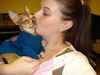

In [102]:
image

In [103]:
image.thumbnail((125,125), Image.ANTIALIAS)

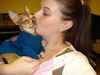

In [104]:
image

In [105]:
image.thumbnail((150,150), Image.ANTIALIAS)

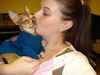

In [106]:
image

In [107]:
image.thumbnail((200,200), Image.ANTIALIAS)

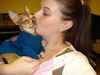

In [108]:
image

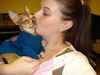

In [109]:
image.thumbnail((300,300), Image.ANTIALIAS)
image

In [110]:
image.thumbnail((500,500), Image.ANTIALIAS)

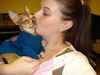

In [111]:
image

In [112]:
image = Image.open('images/n02085620-Chihuahua/n02085620_1816.jpg')# Can be many different formats.

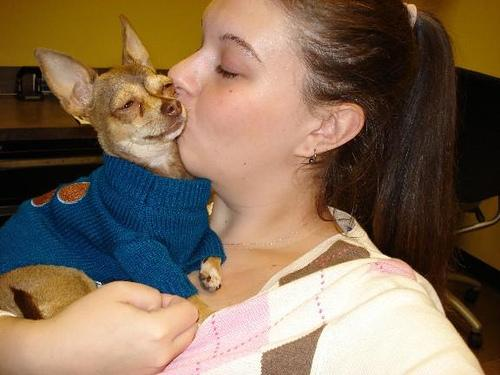

In [113]:
image

In [114]:
image.thumbnail((200,200), Image.ANTIALIAS)

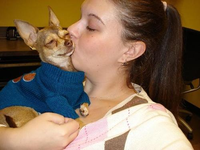

In [115]:
image

In [117]:
image.save('sompic.jpg')

In [118]:
for filename in glob.glob('images/n02085620-Chihuahua/*.jpg'):
    image = Image.open(filename)
    image.thumbnail((200,200), Image.ANTIALIAS)
    image.save('resized_images/'.filename.'jpg')

SyntaxError: invalid syntax (<ipython-input-118-e6f9a6375d51>, line 4)

In [121]:
for filename in glob.glob('images/n02085620-Chihuahua/*.jpg'):
    image = Image.open(filename)
    image.thumbnail((200,200), Image.ANTIALIAS)
    image.save('resized_images/n02085620-Chihuahua/'+filename)

FileNotFoundError: [Errno 2] No such file or directory: 'resized_images/n02085620-Chihuahua/images/n02085620-Chihuahua\\n02085620_10074.jpg'

In [122]:
for filename in glob.glob('images/n02085620-Chihuahua/*.jpg'):
    image = Image.open(filename)
    image.thumbnail((200,200), Image.ANTIALIAS)
    image.save('resized_images/n02085620-Chihuahua/' + str(filename)+'.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'resized_images/n02085620-Chihuahua/images/n02085620-Chihuahua\\n02085620_10074.jpg.jpg'

In [255]:
os.makedirs('resized_images/class 121/')
dist = 'resized_images/class 121/'
c = 0
for filename in glob.glob('images/n02116738-African_hunting_dog/*.jpg'):
    image = Image.open(filename)
    image.thumbnail((200,200), Image.ANTIALIAS)
    c+=1
    image.save(dist+str(c)+'.jpg')

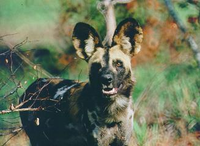

In [256]:
image

In [257]:
image.size

(200, 146)

In [258]:
ar = image.flatten()

AttributeError: 'JpegImageFile' object has no attribute 'flatten'

In [260]:
pix = np.array(image)

In [261]:
pix

array([[[121, 158, 114],
        [120, 159, 114],
        [120, 159, 114],
        ...,
        [137, 124,  98],
        [134, 134, 104],
        [133, 145, 111]],

       [[117, 156, 111],
        [118, 157, 112],
        [119, 160, 114],
        ...,
        [ 94,  86,  62],
        [114, 117,  89],
        [123, 138, 106]],

       [[119, 158, 114],
        [119, 159, 114],
        [118, 160, 114],
        ...,
        [ 82,  82,  58],
        [ 88,  99,  72],
        [ 88, 110,  79]],

       ...,

       [[125, 124,  77],
        [143, 142,  97],
        [134, 134,  93],
        ...,
        [137, 129,  96],
        [139, 131,  97],
        [137, 129,  95]],

       [[131, 131,  86],
        [145, 146, 103],
        [142, 142, 103],
        ...,
        [141, 137,  99],
        [146, 141, 102],
        [140, 135,  96]],

       [[123, 126,  81],
        [110, 113,  71],
        [ 85,  87,  49],
        ...,
        [145, 144, 103],
        [158, 156, 113],
        [152, 148, 104]]

In [262]:
pix.shape

(146, 200, 3)

In [269]:
from PIL import Image, ImageOps
original_image = Image.open("images/n02085620-Chihuahua/n02085620_2887.jpg")
size = (200, 200)
fit_and_resized_image = ImageOps.fit(original_image, size, Image.ANTIALIAS)

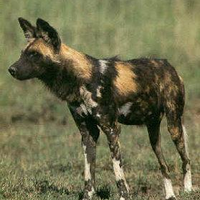

In [264]:
fit_and_resized_image

In [265]:
fit_and_resized_image.size

(200, 200)

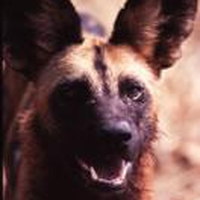

In [267]:
fit_and_resized_image

In [268]:
fit_and_resized_image.size

(200, 200)

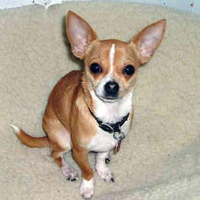

In [270]:
fit_and_resized_image

In [271]:
fit_and_resized_image.size

(200, 200)

In [273]:
os.makedirs('resized_images2/class 1/')
dist = 'resized_images2/class 1/'
c = 0
for filename in glob.glob('images/n02085620-Chihuahua/*.jpg'):
    original_image = Image.open(filename)
    size = (200, 200)
    image = ImageOps.fit(original_image, size, Image.ANTIALIAS)
    c+=1
    image.save(dist+str(c)+'.jpg')

In [307]:
dist = 'resized_images2/class '
dir = 'images'
labels = []
subdirs = [x[1] for x in os.walk(dir)]
k=0
for subdir in subdirs[0]:
    k+=1
    for filename in glob.glob('images/'+str(subdir)+ '/*.jpg'):
        labels.append(k)

In [308]:
labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [310]:
ls = [x for x in labels if x==1]

In [313]:
len([x for x in labels if x==75])

150

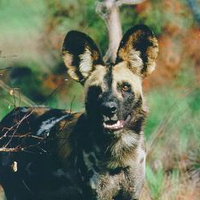

In [314]:
image

In [315]:
image.size

(200, 200)

In [316]:
pix = np.array(image)

In [317]:
pix

array([[[109, 155, 100],
        [117, 162, 107],
        [123, 168, 113],
        ...,
        [126, 139, 114],
        [139, 142, 114],
        [141, 138, 107]],

       [[107, 154,  99],
        [116, 162, 107],
        [122, 168, 113],
        ...,
        [119, 133, 109],
        [129, 134, 106],
        [129, 127,  96]],

       [[106, 153,  99],
        [115, 162, 108],
        [120, 167, 114],
        ...,
        [111, 127, 106],
        [118, 125, 100],
        [117, 119,  89]],

       ...,

       [[158, 157, 123],
        [152, 156, 123],
        [137, 145, 113],
        ...,
        [177, 151, 121],
        [174, 148, 116],
        [170, 142, 108]],

       [[165, 164, 130],
        [157, 163, 130],
        [144, 152, 122],
        ...,
        [177, 153, 121],
        [176, 152, 121],
        [169, 142, 109]],

       [[171, 170, 138],
        [159, 164, 132],
        [148, 158, 127],
        ...,
        [179, 158, 125],
        [183, 160, 127],
        [172, 146, 112]]

In [318]:
pix.shape

(200, 200, 3)

In [319]:
le = np.array(labels)

In [320]:
le

array([  1,   1,   1, ..., 120, 120, 120])

In [321]:
le.shape

(20578,)

In [322]:
label = le

In [323]:
label

array([  1,   1,   1, ..., 120, 120, 120])

In [324]:
label.shape

(20578,)

In [327]:
pix.flatten()

array([109, 155, 100, ..., 172, 146, 112], dtype=uint8)

In [328]:
pix.shape

(200, 200, 3)

In [329]:
pix = pix.flatten()

In [330]:
pix

array([109, 155, 100, ..., 172, 146, 112], dtype=uint8)

In [331]:
pix.shape

(120000,)

In [41]:
dir = 'Images'
subdirs = [x[1] for x in os.walk(dir)]
k=0
pixel=[]
features = []
labels = []
for subdir in subdirs[0]:
    k+=1
    for filename in glob.glob('Images/'+str(subdir)+ '/*'):
        labels.append(k)

In [42]:
len(labels)

20315

In [336]:
len(features)

20578

In [341]:
features[10].shape

(562500,)

In [342]:
features[0]

array([11,  9, 14, ...,  7,  7,  7], dtype=uint8)

In [343]:
features

[array([11,  9, 14, ...,  7,  7,  7], dtype=uint8),
 array([162,  62,  62, ..., 133, 147,  88], dtype=uint8),
 array([ 92,  94,  91, ..., 151, 174, 148], dtype=uint8),
 array([40, 45, 22, ..., 15, 18, 11], dtype=uint8),
 array([124,  83,  53, ..., 144, 107,  80], dtype=uint8),
 array([ 26,  16,  15, ..., 110,  82,  68], dtype=uint8),
 array([216, 230, 239, ..., 159, 155, 169], dtype=uint8),
 array([187, 147, 112, ..., 111,  91,  92], dtype=uint8),
 array([167, 163, 188, ..., 136, 141, 135], dtype=uint8),
 array([153,  93,  82, ..., 127, 130, 147], dtype=uint8),
 array([ 11,  17,  17, ..., 168, 160, 139], dtype=uint8),
 array([30, 14,  1, ..., 16, 10, 12], dtype=uint8),
 array([146, 133,  81, ...,  33,  16,   9], dtype=uint8),
 array([124, 117,  89, ..., 118, 103,  74], dtype=uint8),
 array([3, 3, 3, ..., 5, 5, 5], dtype=uint8),
 array([31, 17, 17, ...,  0,  0,  0], dtype=uint8),
 array([199, 217, 193, ..., 188, 212, 214], dtype=uint8),
 array([40, 45, 38, ..., 42, 44, 39], dtype=uint8)

In [344]:
X_train, X_test, y_train, y_test = train_test_split(
features, label, random_state=0)

In [346]:
X_train.shape

AttributeError: 'list' object has no attribute 'shape'

In [347]:
ar = np.array(X_train)

In [348]:
ar.shape

(15433,)

In [349]:
X_train = ar
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [350]:
X_test.shape

(5145,)

In [351]:
y_test.shape

(5145,)

In [352]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [353]:
knn.fit(X_train,y_train)

ValueError: setting an array element with a sequence.

In [355]:
X_train[0]

array([105, 112, 105, ..., 100,  98,  85], dtype=uint8)

In [356]:
X_train.item(0)

array([105, 112, 105, ..., 100,  98,  85], dtype=uint8)

In [358]:
X_train.item(i)

array([ 15,  11,   8, ..., 225, 213, 217], dtype=uint8)

In [361]:
xtrain=[]
for i in X_train:
    xtrain.append(X_train.item(i))

TypeError: only integer scalar arrays can be converted to a scalar index

In [362]:
X_train

array([array([105, 112, 105, ..., 100,  98,  85], dtype=uint8),
       array([ 99,  86,  95, ..., 161, 166, 108], dtype=uint8),
       array([ 83, 149, 122, ..., 226, 211, 206], dtype=uint8), ...,
       array([245, 245, 245, ..., 245, 245, 245], dtype=uint8),
       array([10,  9,  5, ..., 26, 17, 12], dtype=uint8),
       array([253, 228, 198, ..., 144, 171, 130], dtype=uint8)],
      dtype=object)

In [ ]:
xtrain=[[]]
for i in X_train:
    print(i)

[105 112 105 ... 100  98  85]
[ 99  86  95 ... 161 166 108]
[ 83 149 122 ... 226 211 206]
[ 87  92  72 ... 255 243 213]
[208 210 209 ... 119  17   3]
[ 35  49  62 ... 103  85  83]
[144 139 146 ... 120 145  64]
[239 252 245 ... 255 236 180]
[199 196 189 ... 208 182 155]
[116 113  70 ...   1   3   2]
[255 250 255 ... 195 215 118]
[214 219 212 ...  57  58  60]
[112 110 111 ... 151 151 153]
[127 128 148 ...  90  62 111]
[210 220 229 ... 184 196 212]
[  0   1   0 ...  19 123  62]
[ 46  51  54 ... 200 173 152]
[ 64  63  71 ... 255 254 232]
[224 230 244 ...  61  95  97]
[216 216 216 ...  81  46  27]
[240 227 236 ... 179 122 131]
[148 162 147 ...  80   1   6]
[146 133 142 ... 111 119 121]
[113 180  51 ...  16  28   6]
[193 235 163 ...  44  84  31]
[ 51  44  28 ... 151 108  53]
[215 239 179 ... 207 189 153]
[134 102  77 ... 173 219 172]
[  0   0   0 ... 154 160 158]
[ 13   3   1 ... 250 204  48]
[243 231 245 ... 143 134 165]
[169 161 150 ... 199 189 190]
[255 217 172 ... 203 105  34]
[185 191  

[65 50 43 ...  2  2  2]
[7 7 9 ... 1 1 1]
[227 244 252 ... 119 125  65]
[24 55 14 ... 20 52 15]
[206 204 205 ... 118  98  45]
[112  91  72 ...  87  77  42]
[ 10   9   4 ... 121 103  65]
[205 219 230 ... 111 134  56]
[ 22  22  24 ... 182 193 159]
[162 157 117 ...  37  36  16]
[ 91 112 107 ... 186 194 196]
[104 126  54 ...  98  78  51]
[230 236 232 ... 173 182 181]
[193 219 246 ... 163 177 144]
[27 30 37 ... 41 30 28]
[143 125 111 ... 202 197 201]
[160 166 188 ...  22  24  23]
[223 217 217 ... 106 129  75]
[195 201 167 ... 121 120 126]
[ 0  6  3 ... 52  6  8]
[190 208 232 ...  40  35  32]
[70 96 35 ... 76 99 47]
[46 20 29 ... 99 69 35]
[204 212 233 ... 124 148 186]
[ 88  71  64 ... 192  96  12]
[138 154 216 ... 210 211 205]
[ 98 106  49 ...  81  89  40]
[ 64  74  84 ... 146 147 142]
[178 145 138 ... 172 150 127]
[ 2  4  1 ... 54 49 43]
[255 254 255 ... 219 153 101]
[ 22  22   0 ...  97 123  49]
[236 236 236 ... 232 229 222]
[98 99 81 ... 86 83 40]
[  9  22  39 ... 200 213 245]
[154 151 1

[2 2 2 ... 3 0 0]
[168  99  57 ... 252 248 236]
[178 164 135 ... 147 130 100]
[49 64 23 ... 70 86 41]
[164  86  86 ... 131 107  95]
[123 168 253 ... 103 102  54]
[251 255 135 ... 206 138  65]
[  9   9   7 ... 103 121 145]
[128 163 107 ... 136 162 114]
[209 234 238 ...  60 132 129]
[154 177 167 ...  84  86  85]
[59 54 48 ... 70 56 45]
[171 170 124 ...  89  67  70]
[155 159 108 ... 137 135  96]
[138  14  24 ... 159  21  73]
[ 92  79  70 ... 142 141 146]
[ 79  76 119 ... 183 172 176]
[38  9  3 ... 40 46 68]
[16 51 21 ... 45 67 31]
[  7   2  22 ... 182 162 137]
[190 117  23 ... 238 176 117]
[176 202 199 ...  76  84  87]
[42 39 24 ... 42 24 10]
[34 34 34 ... 82 23 29]
[ 38  39  43 ... 178 140  95]
[155 166 186 ... 175 172 165]
[224 229 233 ... 197 178 161]
[133 129 126 ...  76  66  56]
[208  77 108 ...  65  64  60]
[183 175 196 ... 162 122 123]
[ 36  71 153 ... 106  87  81]
[ 31  21   9 ... 145 111 109]
[119  99 100 ...  67  62  69]
[ 88 133 188 ...  62  65  48]
[ 68 125  46 ... 195 185 183

[32 24 21 ... 58 57 52]
[241 244 197 ...  59  50  35]
[ 46  46  46 ...  88 101 153]
[ 73 121 183 ... 183 180 161]
[65 74 29 ... 33 55  6]
[176 139 112 ... 140  10  10]
[109  91  67 ...  45  37  35]
[ 13  11  12 ... 107 111 114]
[ 77 104  35 ...  48  66  16]
[ 12  48  84 ...  69 103  52]
[236 238 251 ...  75  89  98]
[ 5  7  4 ... 23 24 26]
[243 238 232 ...  13  19  19]
[120 124  97 ...  89  90  85]
[59 66 25 ... 90 98 59]
[135  65   0 ...  30   7   0]
[127 113  76 ... 129 106  90]
[23 28 21 ... 19 56 98]
[122 116  90 ... 142 138  77]
[183 193 169 ...  71  78  88]
[130 118  96 ... 217 205 205]
[ 42  53  49 ... 137 139 118]
[ 49  58  37 ... 202 201 199]
[ 36  84  42 ...  81 121  95]
[ 55  51  65 ... 180 175 172]
[127 101  76 ... 255 199 114]
[ 99 133 160 ... 101  81  70]
[200 194 194 ... 213 209 208]
[ 74  60  59 ... 131 140 137]
[ 79  95 110 ... 126 105  84]
[255 254 250 ...  89  90  85]
[140 160 195 ... 173 167 171]
[ 6  4  5 ...  6  7 12]
[209 241 252 ...  97 100  29]
[ 28  38  30 ...

[190 114  91 ... 107 124 168]
[227 229 224 ... 151 155 130]
[212 215 208 ... 160 124  88]
[49 71 33 ... 46 41 12]
[116 114 102 ...  78  92  75]
[22 21  0 ... 44 53 36]
[ 68  55  73 ... 122 110  86]
[ 51  56  26 ... 104  86  62]
[ 30  36  36 ... 138 118 109]
[110 130 157 ...  70  71  29]
[102 110  71 ...  13  13  13]
[ 69  42  31 ... 255 177  72]
[217 224 234 ... 235 232 243]
[135 147 169 ...  55  86 107]
[ 99  97 108 ... 129 136 118]
[197 175 162 ... 109  77  52]
[142  48  38 ...  17 143  80]
[134 137 146 ... 102  96  98]
[116 121 125 ...  87  87  97]
[171 170 168 ... 214 215 219]
[188 155 112 ...  94  61  30]
[45 68 42 ... 13 36 16]
[40 35 29 ... 70 47 41]
[248 247 252 ... 208 201 208]
[ 0  0  0 ... 74 60 47]
[40 35 31 ... 31 43 41]
[ 26  50  94 ... 131 128 119]
[187 127  73 ... 255 211 149]
[ 60  75  68 ... 111  98  81]
[ 6 12 10 ... 43 66 14]
[ 3  2  0 ... 74 14 16]
[196 223 190 ...   6   9   0]
[37 37 37 ... 61 52 55]
[ 74  62  36 ... 253 253 251]
[ 39 140 184 ...  80  98  98]
[ 63

[41 44 33 ... 85 27 42]
[ 82 126  51 ... 183 220 176]
[133 123 150 ... 255 254 255]
[180 144 148 ... 118  54  19]
[253 254 249 ... 121  75  77]
[53 69 33 ... 79 91 67]
[236 244 187 ... 130 186 111]
[ 67 115 177 ... 203 198 205]
[30 29 27 ... 22 43 26]
[238 248 250 ... 127 103  99]
[10 10  2 ... 59 53 37]
[ 95  93  72 ... 230 230 230]
[ 95  73  15 ... 169 151  79]
[85 89 88 ... 99 69 43]
[ 65 104  49 ... 130 162  95]
[145 145 145 ... 200 194 194]
[107  15  20 ... 111  37  38]
[ 65  72  54 ... 179 198 213]
[ 78  85  93 ... 137 138 140]
[ 81  95  20 ... 141 139  56]
[247 255 255 ... 112 132  63]
[133  86  44 ...  10   9   4]
[128 127 123 ...  96 107  77]
[151 153 148 ... 114 116 131]
[ 55  60  54 ...  73 105  58]
[184 166 152 ... 211 171 159]
[ 43  19   7 ... 151 102  85]
[161 186 226 ...  82  89  97]
[168 168 168 ... 203 204 208]
[72 58 32 ... 71 32  3]
[115 119   9 ... 157 192  40]
[111 176 218 ... 101 109  50]
[125 130 124 ...  27  52  56]
[116 114  91 ... 103  88  69]
[145 139 139 ...

[90 85 92 ... 73 74 78]
[193 224 226 ... 162 135 114]
[164 161 170 ... 164 196 172]
[233 241 244 ...  92 108  59]
[103 100  93 ... 146 143 136]
[ 56  71  32 ... 156 150 150]
[161 157 148 ...  77  75  78]
[ 35  53  39 ... 176 168 121]
[170 186 201 ...  87  83  72]
[ 90  78  66 ... 106  84  71]
[ 21  24  33 ... 231 218  88]
[148 157 154 ... 155 146 113]
[252 218 191 ...  98  67  49]
[24 42 64 ... 35 45 55]
[ 37  41  27 ... 116 113  80]
[227 226 231 ...  57  68  36]
[150  87  80 ...  96  93  60]
[142 183  91 ... 119 156  76]
[  7   7   7 ... 171 152 119]
[123 126  73 ... 112 115  58]
[240 255 218 ... 179 180 185]
[205 181 181 ... 176 152 148]
[133 202 255 ... 161 140 111]
[245 213 166 ...  13  12  17]
[  7  67 127 ... 196 204 193]
[ 57  57  57 ... 140 169 199]
[101 168  52 ... 240 214 187]
[68 74 74 ... 21 31 20]
[ 91  85  69 ...  70  85 106]
[166 144  86 ...  35  27  14]
[145 146 140 ... 112 123 141]
[219 204 171 ...  63  57   7]
[126 165  98 ... 193 219 171]
[199 147  48 ... 188 133  30

[ 73  36  28 ... 194 140  52]
[105  91  90 ... 162 147 142]
[172 176 187 ... 105 108 113]
[151 138 119 ... 147 131  98]
[115  87  50 ...  24  25  20]
[13 17 16 ... 47 76 22]
[248 248 248 ... 136 129 103]
[237 209 224 ...  27  43  33]
[168 124 115 ...  16  14  15]
[ 30  40  67 ... 119 115 103]
[ 64  75  58 ... 197 190 164]
[117 103  74 ...  37  52  71]
[254 255 255 ... 247 255 253]
[123  77  27 ...  72  62  71]
[117 113 102 ... 136 113 105]
[254 254 254 ... 255 255 255]
[127 158  65 ... 109 132  80]
[ 96  95  90 ...  85 109  35]
[ 15  10  16 ...  86 104  46]
[129 136 152 ... 118  89  33]
[128 100  88 ... 171 162 153]
[ 7 10  3 ... 30 47 11]
[ 80 128  90 ... 136 162 135]
[200 222 246 ... 228 244 255]
[112 113 118 ...  80  87  93]
[131 131 123 ... 139 162 170]
[ 44  37  27 ... 235 251 222]
[138 144 156 ...  83 112  48]
[175 169 145 ... 161 154 136]
[ 89 121  82 ... 136 135 141]
[ 82  67  46 ... 177 195 169]
[255 252 250 ... 154 176 138]
[57 50 22 ... 95 88 59]
[230 234 243 ... 216 197 183

[1 0 0 ... 3 0 0]
[ 38  47  30 ... 115 158  69]
[101 113  93 ... 210  87  90]
[178 139  96 ...  30  34  45]
[127 126 105 ...  79  64  25]
[52 43 28 ... 43 45 57]
[222 250 127 ...  58  87  33]
[141 159 117 ...  94 105  49]
[ 61  63  52 ... 227 237 247]
[180 203 121 ...   2   1   0]
[248 238 246 ... 246 244 245]
[ 74  40  31 ... 127  87  77]
[ 93 108  53 ... 168 122  72]
[142  42  40 ... 255 220 194]
[ 38  39  34 ... 107 103  55]
[122 191 246 ...  14  12  15]
[ 97 102  35 ...  52 135  27]
[139 152 160 ... 255 146   0]
[ 77  82  86 ... 115  58  51]
[ 31  58  69 ... 229 203 154]
[60 69 12 ... 84 73 55]
[ 57  45  31 ... 102 116  57]
[ 21  22  17 ... 170 141  81]
[ 53  49  46 ... 182 192 202]
[56 51 47 ... 72 57 50]
[149 163 164 ... 147 132 125]
[172 175 130 ... 142 152  91]
[184 217 170 ...  77 145  88]
[ 69  57  45 ... 103  84  78]
[56 52 43 ... 69 82 39]
[142 112  88 ... 159 138 133]
[  2   2   2 ... 118 122 133]
[ 72  56  40 ... 107  78  48]
[138  94  67 ... 102  94  81]
[13 13 13 ... 51

[167 206 175 ...  90 116  89]
[16  6  4 ... 89 77 51]
[113  96 115 ... 139 175 191]
[ 70 104 105 ...  26  27  29]
[137 133 121 ...  73  62  44]
[ 66  43  59 ... 103 124  65]
[ 87  66  49 ...  61 112  93]
[165 154 126 ... 111  45  46]
[231 255 135 ...  86  75  57]
[206 225 179 ...  70  85 118]
[94 92 95 ... 46 40 44]
[249 244 240 ... 205 203 216]
[ 32  78 112 ... 255 255 255]
[231 230 244 ... 232 234 246]
[228 253 255 ... 167 181 132]
[148 143 111 ...  50  46  47]
[ 85  96 150 ...   2   2   2]
[117 115 102 ... 168 167 163]
[72 60 72 ... 36 58 35]
[ 58  72  57 ... 122 135 118]
[255 254 255 ... 101  99  76]
[107 135 182 ... 179 194 225]
[241 230 234 ...  76 101  69]
[ 21  22  16 ... 128 123 119]
[149 139 138 ... 164 147 139]
[46 64 42 ... 52 58 24]
[131 109  95 ... 206 183 165]
[  0   1   0 ... 158 154 151]
[104  75  15 ...  58  45  37]
[166 124  82 ... 153  92  63]
[154 113   8 ... 128 121  17]
[228 247 253 ...  18  22   7]
[115 127 115 ... 100 141  62]
[  4   4   4 ... 130 121 112]
[166

[2 1 6 ... 5 5 5]
[122 103  71 ...  98  96  57]
[96 93 86 ... 84 88 87]
[14 14 12 ...  2  2  2]
[229 236 246 ... 254 253 249]
[136 137 131 ...  76  76  66]
[32 28 29 ... 23 53  0]
[104 108  73 ...  53  49  40]
[208 207 213 ...  76  75  89]
[21 22 17 ... 14 30  0]
[ 16  60 155 ...  93  62 104]
[67 28 33 ... 65 81 54]
[ 19  26  18 ... 173 171 159]
[177 189 205 ... 147 149 164]
[122 142 167 ... 135 137 134]
[155 154  97 ... 100 113  57]
[255 253 244 ... 254 254 255]
[194 235 227 ...  68 112 187]
[82 88 88 ... 25 35 47]
[ 63  79  50 ... 139 175 131]
[ 13  12  20 ... 163 153  81]
[167 161 145 ... 198 197 177]
[13 14  8 ... 44 47 18]
[150 171 192 ... 137 155 169]
[129 130 132 ...  13   7   7]
[180 159 106 ... 255 238 182]
[159 158 154 ...  63  66  35]
[  4   3   9 ... 115 101 100]
[165 139 106 ...  10  12   7]
[66 46 35 ...  7  3  2]
[26 67  9 ... 27 73  8]
[122 122 120 ...  52  71  41]
[66 74 33 ... 71 78 34]
[173 160 108 ...  10   6   3]
[219 221 233 ... 150 121 117]
[ 54  57  62 ... 254 2

[131 127 115 ... 169 160 151]
[ 88 100 126 ... 109 113 140]
[ 31  49  53 ... 106 103 122]
[ 36  40  23 ... 196 206 156]
[143 155 151 ... 139 139 139]
[ 91  86  90 ...  67 104  34]
[  1   1   1 ... 157 113  68]
[100 153 197 ... 116 121 115]
[246 251 255 ... 255 254 255]
[117 142 120 ... 135 141 127]
[ 53  43  44 ... 181 139  91]
[56 57 43 ... 12 12 10]
[ 45  40  44 ... 208 197 167]
[80 46 47 ... 37 46 29]
[108 124  35 ... 122 133  75]
[ 81  21  20 ... 114 151 193]
[ 66  54  64 ... 113 105 120]
[139 191  31 ...   5  10   4]
[176 208  85 ...  69  76  43]
[ 82  93  76 ... 143 135 124]
[119 112  57 ...  27  29  26]
[169 156 147 ... 197 182 175]
[209 225 152 ... 101 154  66]
[ 34  35  29 ... 142 142 142]
[109 122 130 ... 101 112 116]
[158 163 159 ... 130 145 164]
[204 209 187 ... 176 157 159]
[140 153 162 ...  16  16  14]
[ 65  62  47 ... 101  72  64]
[146 137 122 ... 157 162 158]
[ 56  81  51 ... 158 189  86]
[  0   8  10 ...  72  88 121]
[124 104  67 ... 172 152 115]
[ 4  4  4 ... 66 73 83

[ 66 129  24 ...  54  74  47]
[215 238 194 ...  97 136 117]
[254 254 254 ... 254 254 254]
[247 249 246 ... 252 255 255]
[177 176 174 ...  62  31  28]
[252 254 249 ...  25  27  26]
[239 198 154 ...  57  59  74]
[67 47 23 ... 81 94 68]
[ 60  67  49 ... 158 143  88]
[184  94  44 ...  56  45  61]
[68 18 11 ... 92 63 57]
[ 89 158 113 ... 116 185  96]
[ 40  42  41 ... 233 228 222]
[249 248 244 ... 219 215 206]
[ 1 12  0 ... 91 97 97]
[103 104  36 ...  73  94  15]
[113 141 119 ... 151 166 209]
[146 155 102 ... 255 255 236]
[49 59 50 ... 70 68 69]
[83 43 44 ... 89 86 77]
[156 169 125 ... 108 138  64]
[ 14  28  15 ... 174 175 169]
[120  58  59 ...   5  77 127]
[207 207 205 ... 196 200 203]
[214 225 227 ...  57  71  72]
[160 120 157 ... 135 106  90]
[ 94 135  75 ...  44  88  37]
[ 45  90  21 ... 183 146 154]
[19 33 46 ... 31 32 37]
[103  60  26 ...  31  21  19]
[ 41  40  46 ...  78 117  24]
[75 65 64 ... 98 94 30]
[ 75  66  49 ... 206 206 206]
[249 247 248 ... 111 136 106]
[49 50 32 ...  5  6  1

In [2]:
label

NameError: name 'label' is not defined

In [35]:
import os
import glob
dir = 'images'
subdirs = [x[1] for x in os.walk(dir)]
k=0
labels = []
for subdir in subdirs[0]:
    k+=1
    for filename in glob.glob('images/'+str(subdir)+ '/*.jpg'):
        labels.append(k)

In [36]:
len(labels)

20315

In [8]:
x = [x for x in labels if x==1]

In [10]:
len(x)

152

In [11]:
import numpy as np
labels = np.array(labels)

In [12]:
labels

array([  1,   1,   1, ..., 120, 120, 120])

In [13]:
labels.shape

(20578,)

In [14]:
np.savetxt("labels.csv", labels, delimiter=",")

In [16]:
import csv
file=open("labels.CSV", "r")
reader = csv.reader(file)

In [17]:
reader

In [18]:
for i in reader:
    print(i)

['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.000000000000000000e+00']
['1.0000000000

['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.000000000000000000e+01']
['1.0000000000

['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.600000000000000000e+01']
['1.6000000000

['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.400000000000000000e+01']
['2.500000000000000000e+01']
['2.500000000000000000e+01']
['2.500000000000000000e+01']
['2.500000000000000000e+01']
['2.500000000000000000e+01']
['2.500000000000000000e+01']
['2.500000000000000000e+01']
['2.500000000000000000e+01']
['2.500000000000000000e+01']
['2.5000000000

['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.300000000000000000e+01']
['3.3000000000

['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.100000000000000000e+01']
['4.1000000000

['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.000000000000000000e+01']
['5.0000000000

['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.900000000000000000e+01']
['5.9000000000

['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.900000000000000000e+01']
['6.9000000000

['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.800000000000000000e+01']
['7.8000000000

['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.800000000000000000e+01']
['8.8000000000

['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.700000000000000000e+01']
['9.7000000000

['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.050000000000000000e+02']
['1.0500000000

['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.130000000000000000e+02']
['1.1300000000

In [22]:
import scipy.io as sp
sp.savemat('label.mat',labels)

AttributeError: 'numpy.ndarray' object has no attribute 'items'

In [28]:
np.savetxt('labels.mat', x, delimiter=',') 

In [31]:
file = sp.loadmat('labels.mat')

ValueError: Unknown mat file type, version 101, 43

In [33]:
import scipy.io as sp
mat = sp.loadmat('labels.mat')

ValueError: Unknown mat file type, version 101, 43

In [5]:
import scipy.io as sp
mat = sp.loadmat('labels.mat')

ValueError: Unknown mat file type, version 101, 43

In [8]:
import numpy as np

In [9]:
import os
import glob
dir = 'images'
subdirs = [x[1] for x in os.walk(dir)]
k=0
labels = []
for subdir in subdirs[0]:
    k+=1
    for filename in glob.glob('images/'+str(subdir)+ '/*.jpg'):
        labels.append(k)

In [10]:
labels = np.array(labels)

In [11]:
labels.shape

(20578,)

In [12]:
import scipy.io as sp
sp.savemat('label.mat', {'vect':labels})

In [13]:
mat = sp.loadmat('label.mat')

In [22]:
sp.savemat('label.mat', {'arr': labels})

In [18]:
mat = sp.loadmat('label.mat')

In [27]:
np.savetxt("labels", labels, newline=" ")

In [25]:
labels

array([  1,   1,   1, ..., 120, 120, 120])

In [26]:
labels[0]

1

In [29]:
np.savetxt("labels.txt",labels, fmt="%s")

In [30]:
np.savetxt("lab.mat",labels, fmt="%s")

In [32]:
file = open("labels.txt", "r")

In [33]:
lines = file.readlines()

In [35]:
file.close()

In [36]:
file = open("labels.txt", "r")
lines = file.read().split(',')

In [38]:
from tempfile import TemporaryFile
outfile = TemporaryFile()

In [39]:
outfile

In [40]:
np.save(outfile,labels)

In [41]:
np.savetxt('lab.txt',labels, fmt='%d')

In [42]:
b = np.loadtxt('labels.txt', dtype=int)

In [43]:
b

array([  1,   1,   1, ..., 120, 120, 120])

In [44]:
b==labels

array([ True,  True,  True, ...,  True,  True,  True])

In [45]:
labels.shape

(20578,)

In [47]:
a = np.array([[1,2,3],[4,5,6]])

In [48]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [50]:
a.tolist()

[[1, 2, 3], [4, 5, 6]]

In [51]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [69]:
la = np.array(ls)

In [181]:
from PIL import Image
#ls = []
for filename in glob.glob('resized_images/class 66/*.jpg'):
    image = Image.open(filename)
    pix = np.array(image)
    pix = pix.flatten()
    pix = pix.tolist()
    ls.append(pix)

KeyboardInterrupt: 

In [117]:
la = np.array(ls)
la.shape

(5981, 120000)

ImportError: cannot import name 'Images' from 'PIL' (c:\users\studa\appdata\local\programs\python\python37\lib\site-packages\PIL\__init__.py)

In [190]:
from PIL import Image,ImageOps
ls=[]
dist = 'resized_images2/class '
dir = 'resized_images2'
subdirs = [x[1] for x in os.walk(dir)]
for subdir in subdirs[0]:
    for filename in glob.glob('resized_images/'+str(subdir)+ '/*.jpg'):
        image = Image.open(filename)
        pix = np.array(image)
        pix = pix.flatten()
        pix = pix.tolist()
        ls.append(pix)

In [ ]:
ar = np.array(ls)

In [ ]:
2+3

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

In [3]:
def image_to_feature_vector(image, size=(128, 128)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

In [29]:
ls = []
labels = []
for filename in glob.glob('working1/class 5/*.jpg'):
    image = Image.open(filename)
    size = (50, 50)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)#.convert('LA')
    pix = np.array(image)
    pix = pix.flatten()
    pix = pix.tolist()
    ls.append(pix)
    labels.append(5)

In [30]:
data = np.array(ls)
data.shape

(150, 7500)

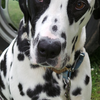

In [143]:
image

In [67]:
import numpy as np
from PIL import Image
from PIL import ImageOps
import glob
import os
dir = 'working1'
ls=[]
labels = []
subdirs = [x[1] for x in os.walk(dir)]
k=0
for subdir in subdirs[0]:
    k+=1
    print(str(subdir))
    for filename in glob.glob('working1/'+str(subdir) +'/*.jpg'):
        image = Image.open(filename)
        size = (50, 50)
        image = ImageOps.fit(image, size, Image.ANTIALIAS)#.convert('LA')
        pix = np.array(image)
        pix = pix.flatten()
        pix = pix.tolist()
        ls.append(pix)
        labels.append(k)

class 1
class 10
class 11
class 12
class 13
class 14
class 15
class 16
class 17
class 18
class 19
class 2
class 3
class 4
class 5
class 6
class 8
class 9
hunting dog
shiba


In [78]:
dataset = np.array(ls)
labels = np.array(labels)
dataset.shape

(3240, 7500)

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset,labels,random_state=2)

In [81]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,42,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    print("at k = "+str(i)+" , accuracy =  "+str(knn.score(X_test,y_test)*100)+str("%"))

at k = 1 , accuracy =  21.358024691358025%
at k = 3 , accuracy =  21.358024691358025%
at k = 5 , accuracy =  21.85185185185185%
at k = 7 , accuracy =  22.71604938271605%
at k = 9 , accuracy =  22.34567901234568%
at k = 11 , accuracy =  21.975308641975307%
at k = 13 , accuracy =  21.48148148148148%
at k = 15 , accuracy =  22.71604938271605%
at k = 17 , accuracy =  23.08641975308642%
at k = 19 , accuracy =  23.827160493827158%
at k = 21 , accuracy =  22.962962962962962%
at k = 23 , accuracy =  23.209876543209877%
at k = 25 , accuracy =  23.580246913580247%
at k = 27 , accuracy =  23.08641975308642%
at k = 29 , accuracy =  22.962962962962962%
at k = 31 , accuracy =  22.962962962962962%
at k = 33 , accuracy =  23.08641975308642%
at k = 35 , accuracy =  23.08641975308642%
at k = 37 , accuracy =  23.209876543209877%
at k = 39 , accuracy =  23.580246913580247%
at k = 41 , accuracy =  23.703703703703706%


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import svm
X_train1,X_test1,y_train1,y_test1 = train_test_split(dataset,labels,random_state=2)
clf = svm.SVC(C=5,gamma='scale')
clf.fit(X_train1,y_train1)
clf.score(X_test1,y_test1)*100

37.407407407407405

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#knn2 = KNeighborsClassifier()
#param_grid = {'n_neighbors': np.arange(1, 25)}
#knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#knn_gscv.fit(dataset, labels)
#knn_gscv.best_params_

supp = svm.SVC(gamma='scale')
param_grid = {'C': np.arange(1, 11)}
svm_gscv = GridSearchCV(supp, param_grid, cv=5)
svm_gscv.fit(dataset, labels)
svm_gscv.best_params_

KeyboardInterrupt: 

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import svm
for i in range(1,50):
    clf = svm.SVC(C=500,gamma=0.00001,kernel='linear')
    clf.fit(X_train,y_train)
    print(clf.score(X_test,y_test)*100)

33.827160493827165
35.80246913580247
36.2962962962963
36.666666666666664
37.407407407407405
37.160493827160494
37.28395061728395
37.28395061728395
37.160493827160494
37.160493827160494
37.160493827160494


KeyboardInterrupt: 

In [ ]:
#train_test_split(random_state=1) , SVM acc = 34.4% , Knn acc = 23.7%
#train_test_split(random_state=2) , SVM acc = ??% , Knn acc = 23.8%
#train_test_split(random_state=5) , SVM acc = 37.4%(c=5) , Knn acc =XD%

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("at k = "+str(i)+" , accuracy =  "+str(knn.score(X_test,y_test)*100)+str("%"))

In [23]:
import numpy as np
from PIL import Image
from PIL import ImageOps
import glob
import os
import PIL
#image = Image.open("SybDog.jpg")

In [11]:
image.show

<bound method Image.show of <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=540x960 at 0x19779803860>>

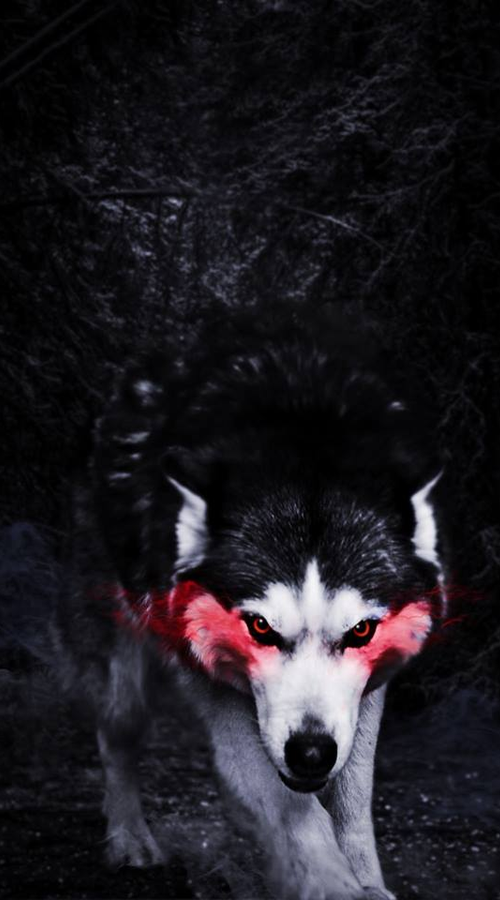

In [20]:
image = Image.open("SybDog.jpg")
size = (500,900)
image = ImageOps.fit(image, size, Image.ANTIALIAS)#.convert('LA')
image

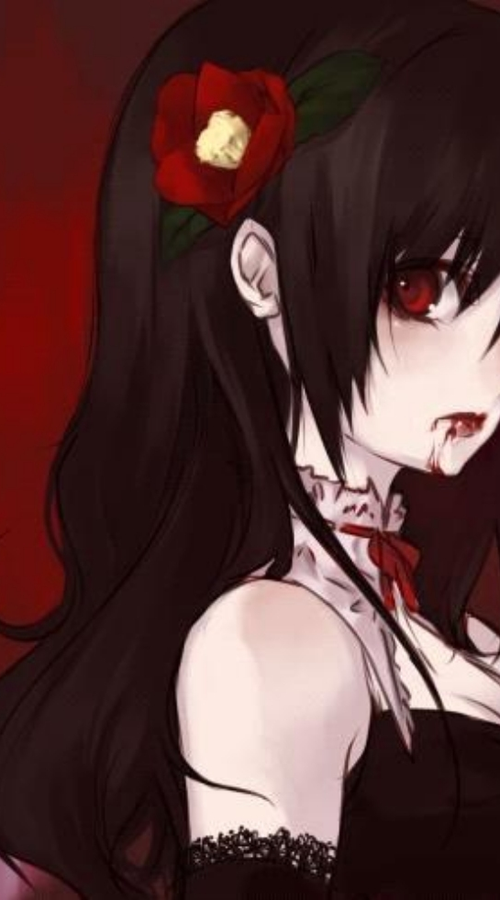

In [21]:
image2 = Image.open("anime.jpg")
size = (500,900)
image2 = ImageOps.fit(image2, size, Image.ANTIALIAS)#.convert('LA')
image2

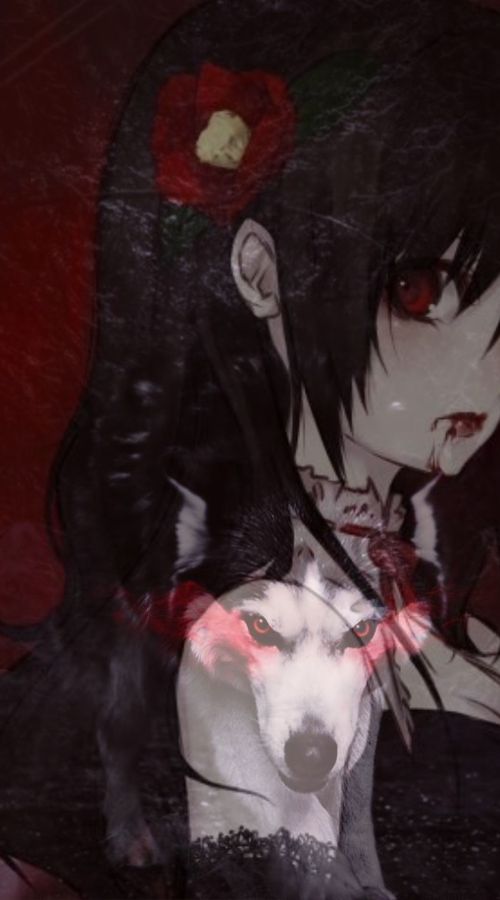

In [29]:
PIL.Image.blend(image2, image, 0.5)